# Riemann Problem

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit.simdir import SimDir
from kuibit.grid_data import UniformGrid
import os

In [2]:
plt.rcParams.update({
    "text.usetex": True,            # Use LaTeX for text rendering
    "font.family": "serif",         # Use serif fonts (LaTeX default)
    "font.serif": ["Computer Modern Roman"],  # Default LaTeX font
})

## Exact Solution

In [3]:
#initial data from the Exact Riemann solver of https://www.brunogiacomazzo.org/?page_id=395
exact = np.loadtxt("Sod_exact.dat")

In [4]:
x_exact=exact[:,0]
rho_exact=exact[:,1]
press_exact=exact[:,2] #note: this is pgas+pmag
vx_exact=exact[:,3]
vy_exact=exact[:,4]
vz_exact=exact[:,5]
By_exact=exact[:,6]
Bz_exact=exact[:,7]

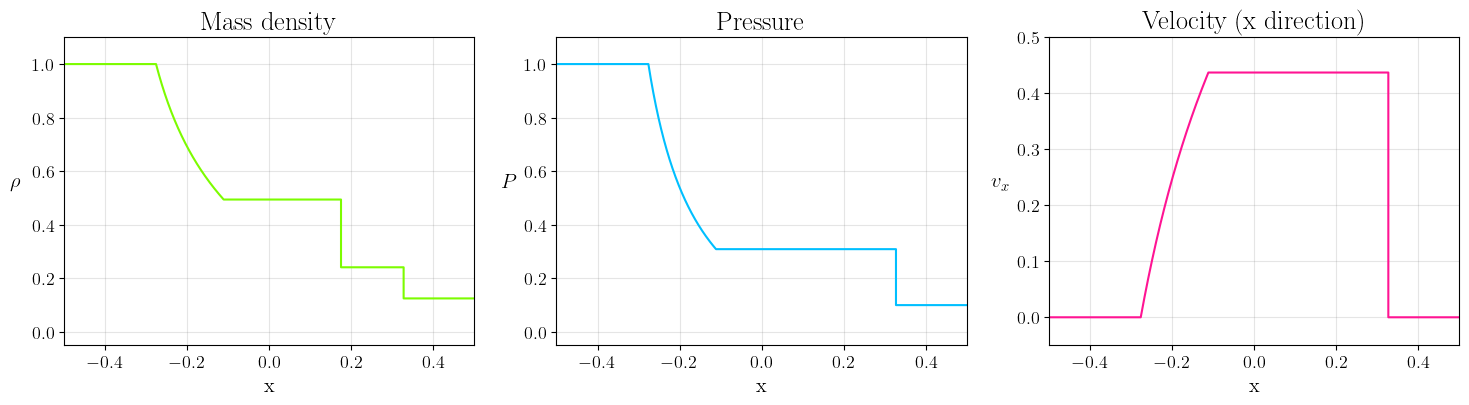

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(x_exact, rho_exact, c='lawngreen')
axes[0].set_title('Mass density', fontsize=19)
axes[0].set_ylabel(r'$\rho$', rotation=0, labelpad=12, fontsize=15)
axes[0].set_ylim(-0.05, 1.1)
    
axes[1].plot(x_exact, press_exact, c='deepskyblue')
axes[1].set_title('Pressure', fontsize=19)
axes[1].set_ylabel(r'$P$', rotation=0, labelpad=12, fontsize=15)
axes[1].set_ylim(-0.05, 1.1)

axes[2].plot(x_exact, vx_exact, c='deeppink')
axes[2].set_title('Velocity (x direction)', fontsize=19)
axes[2].set_ylabel(r'$v_x$', rotation=0, labelpad=12, fontsize=15)
axes[2].set_ylim(-0.05, 0.5)

for ax in axes:
    ax.grid(alpha=0.2, c='grey')
    ax.set_xlabel('x', fontsize=15)
    ax.tick_params(axis='x', labelsize=13)
    ax.tick_params(axis='y', labelsize=13)
    ax.set_xlim(-0.5, 0.5)

plt.savefig('Exact_solution', dpi=200, bbox_inches='tight')
plt.show()

## Read the Numerical Results

In [6]:
#print(os.path.exists("/home/alice/simulations/Sod400/output-0000"))

In [7]:
gf200= SimDir("/home/alice/simulations/Sod200/output-0000").gf
gf400= SimDir("/home/alice/simulations/Sod400/output-0000").gf
gf800= SimDir("/home/alice/simulations/Sod800/output-0000").gf

print(gf200)


Available grid data of dimension 1D (x): 
['tau', 'eps', 'vel[0]', 'rho', 'w_lorentz', 'press', 'vel[1]', 'scon[1]', 'scon[0]', 'vel[2]', 'dens', 'scon[2]']


Available grid data of dimension 1D (y): 
['rho', 'vel[2]', 'scon[0]', 'tau', 'dens', 'eps', 'scon[2]', 'vel[1]', 'press', 'w_lorentz', 'vel[0]', 'scon[1]']


Available grid data of dimension 1D (z): 
['scon[1]', 'w_lorentz', 'press', 'scon[0]', 'vel[1]', 'tau', 'scon[2]', 'vel[2]', 'rho', 'vel[0]', 'eps', 'dens']


Available grid data of dimension 2D (xy): 
[]


Available grid data of dimension 2D (xz): 
[]


Available grid data of dimension 2D (yz): 
[]


Available grid data of dimension 3D (xyz): 
[]



In [8]:
# Avaiable grid data of dimension 1D along x
vars1d200=gf200.x
vars1d400=gf400.x
vars1d800=gf800.x

print(vars1d200)


Available grid data of dimension 1D (x): 
['tau', 'eps', 'vel[0]', 'rho', 'w_lorentz', 'press', 'vel[1]', 'scon[1]', 'scon[0]', 'vel[2]', 'dens', 'scon[2]']



In [9]:
rho200=vars1d200.fields.rho
rho400=vars1d400.fields.rho
rho800=vars1d800.fields.rho

press200=vars1d200.fields.press
press400=vars1d400.fields.press
press800=vars1d800.fields.press

vx200=vars1d200.fields.vel[0]
vx400=vars1d400.fields.vel[0]
vx800=vars1d800.fields.vel[0]

## Kuibit Standard Methods for Plots

We create a uniform grid and plot the data on it. Kuibit indeed assumes that data were produced on a grid with several meshes (AMR). In our case the grid was already uniform, so later we will see an alternative way to plot the data without interpolating them on a new grid.

In [10]:
# Create an uniform grid of 101 points, going from -0.45 to 0.45.
small_grid = UniformGrid([101], x0=[-0.45], x1=[0.45])

In [11]:
# We saved rho at every 10 iterations, so these are the ones I have:
print(rho200.iterations)
print(rho400.iterations)
print(rho800.iterations)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400]


In [12]:
# read_on_grid interpolates rho on the small_grid we created, at the last iteration
rho_final200 = rho200.read_on_grid(rho200.iterations[-1], small_grid)
rho_final400 = rho400.read_on_grid(rho400.iterations[-1], small_grid)
rho_final800 = rho800.read_on_grid(rho800.iterations[-1], small_grid)

press_final200 = press200.read_on_grid(press200.iterations[-1], small_grid)
press_final400 = press400.read_on_grid(press400.iterations[-1], small_grid)
press_final800 = press800.read_on_grid(press800.iterations[-1], small_grid)

vx_final200 = vx200.read_on_grid(vx200.iterations[-1], small_grid)
vx_final400 = vx400.read_on_grid(vx400.iterations[-1], small_grid)
vx_final800 = vx800.read_on_grid(vx800.iterations[-1], small_grid)

In [13]:
print(*rho_final200.coordinates_meshgrid())

[-4.50000000e-01 -4.41000000e-01 -4.32000000e-01 -4.23000000e-01
 -4.14000000e-01 -4.05000000e-01 -3.96000000e-01 -3.87000000e-01
 -3.78000000e-01 -3.69000000e-01 -3.60000000e-01 -3.51000000e-01
 -3.42000000e-01 -3.33000000e-01 -3.24000000e-01 -3.15000000e-01
 -3.06000000e-01 -2.97000000e-01 -2.88000000e-01 -2.79000000e-01
 -2.70000000e-01 -2.61000000e-01 -2.52000000e-01 -2.43000000e-01
 -2.34000000e-01 -2.25000000e-01 -2.16000000e-01 -2.07000000e-01
 -1.98000000e-01 -1.89000000e-01 -1.80000000e-01 -1.71000000e-01
 -1.62000000e-01 -1.53000000e-01 -1.44000000e-01 -1.35000000e-01
 -1.26000000e-01 -1.17000000e-01 -1.08000000e-01 -9.90000000e-02
 -9.00000000e-02 -8.10000000e-02 -7.20000000e-02 -6.30000000e-02
 -5.40000000e-02 -4.50000000e-02 -3.60000000e-02 -2.70000000e-02
 -1.80000000e-02 -9.00000000e-03  5.55111512e-17  9.00000000e-03
  1.80000000e-02  2.70000000e-02  3.60000000e-02  4.50000000e-02
  5.40000000e-02  6.30000000e-02  7.20000000e-02  8.10000000e-02
  9.00000000e-02  9.90000

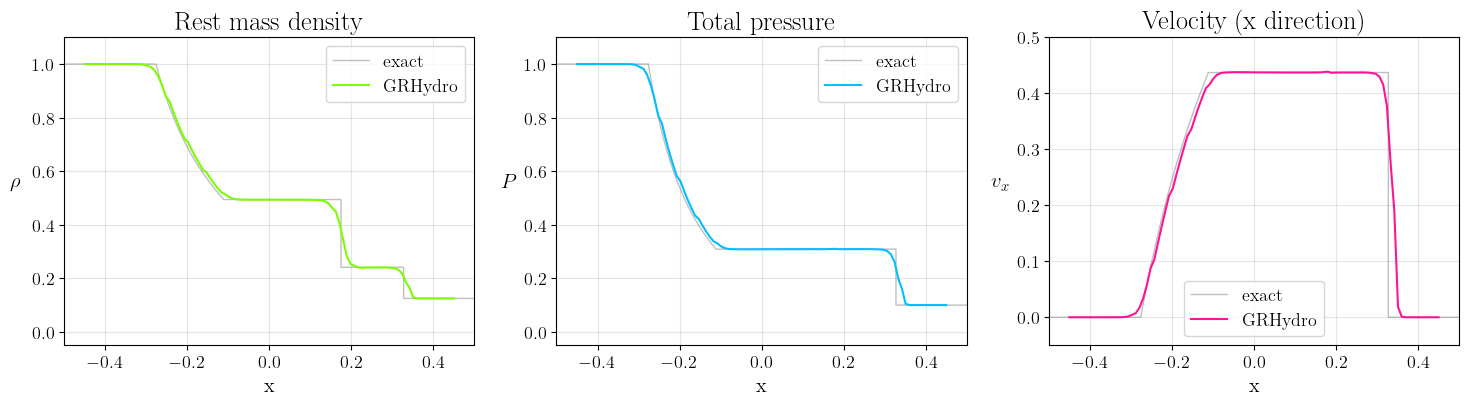

In [14]:
# FOR SOD200

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(x_exact, rho_exact, c='grey', alpha=0.5, lw=1, label="exact")
axes[0].plot(*rho_final200.coordinates_meshgrid(), rho_final200.data_xyz, c='lawngreen', label="GRHydro")
axes[0].set_title('Rest mass density', fontsize=19)
axes[0].set_ylabel(r'$\rho$', rotation=0, labelpad=12, fontsize=15)
axes[0].set_ylim(-0.05, 1.1)

axes[1].plot(x_exact, press_exact, c='grey', alpha=0.5, lw=1, label="exact")
axes[1].plot(*press_final200.coordinates_meshgrid(), press_final200.data_xyz, c='deepskyblue', label="GRHydro")
axes[1].set_title('Total pressure', fontsize=19)
axes[1].set_ylabel(r'$P$', rotation=0, labelpad=12, fontsize=15)
axes[1].set_ylim(-0.05, 1.1)

axes[2].plot(x_exact, vx_exact, c='grey', alpha=0.5, lw=1, label="exact")
axes[2].plot(*vx_final200.coordinates_meshgrid(), vx_final200.data_xyz, c='deeppink', label="GRHydro")
axes[2].set_title('Velocity (x direction)', fontsize=19)
axes[2].set_ylabel(r'$v_x$', rotation=0, labelpad=12, fontsize=15)
axes[2].set_ylim(-0.05, 0.5)

for ax in axes:
    ax.grid(alpha=0.2, c='grey')
    ax.set_xlabel('x', fontsize=15)
    ax.tick_params(axis='x', labelsize=13)
    ax.tick_params(axis='y', labelsize=13)
    ax.legend(fontsize=13)
    ax.set_xlim(-0.5, 0.5)

plt.savefig('Sod_200_results', dpi=200, bbox_inches='tight')
plt.show()

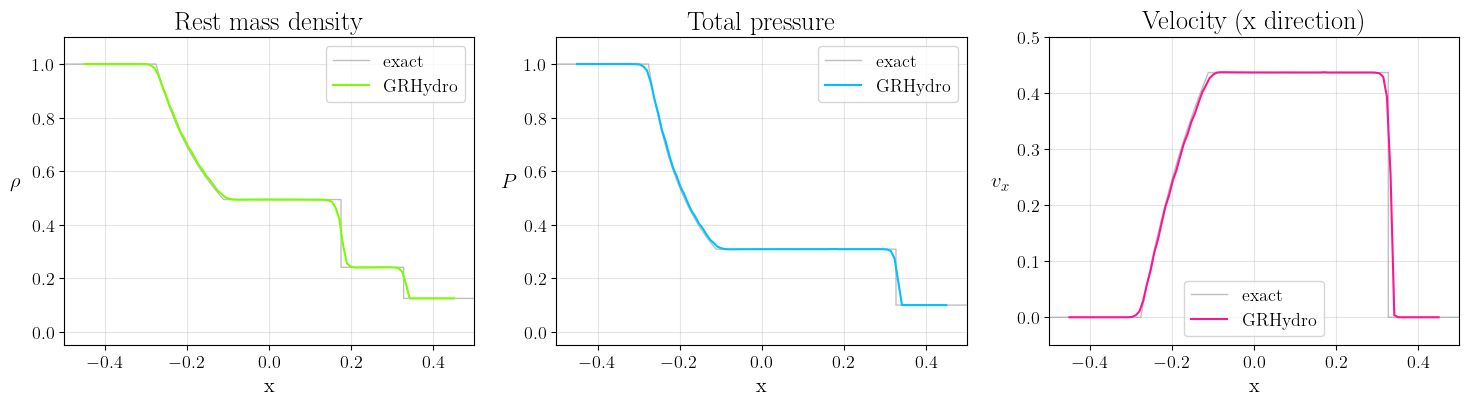

In [15]:
# FOR SOD400

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(x_exact, rho_exact, c='grey', alpha=0.5, lw=1, label="exact")
axes[0].plot(*rho_final400.coordinates_meshgrid(), rho_final400.data_xyz, c='lawngreen', label="GRHydro")
axes[0].set_title('Rest mass density', fontsize=19)
axes[0].set_ylabel(r'$\rho$', rotation=0, labelpad=12, fontsize=15)
axes[0].set_ylim(-0.05, 1.1)

axes[1].plot(x_exact, press_exact, c='grey', alpha=0.5, lw=1, label="exact")
axes[1].plot(*press_final400.coordinates_meshgrid(), press_final400.data_xyz, c='deepskyblue', label="GRHydro")
axes[1].set_title('Total pressure', fontsize=19)
axes[1].set_ylabel(r'$P$', rotation=0, labelpad=12, fontsize=15)
axes[1].set_ylim(-0.05, 1.1)

axes[2].plot(x_exact, vx_exact, c='grey', alpha=0.5, lw=1, label="exact")
axes[2].plot(*vx_final400.coordinates_meshgrid(), vx_final400.data_xyz, c='deeppink', label="GRHydro")
axes[2].set_title('Velocity (x direction)', fontsize=19)
axes[2].set_ylabel(r'$v_x$', rotation=0, labelpad=12, fontsize=15)
axes[2].set_ylim(-0.05, 0.5)

for ax in axes:
    ax.grid(alpha=0.2, c='grey')
    ax.set_xlabel('x', fontsize=15)
    ax.tick_params(axis='x', labelsize=13)
    ax.tick_params(axis='y', labelsize=13)
    ax.legend(fontsize=13)
    ax.set_xlim(-0.5, 0.5)

plt.savefig('Sod_400_results', dpi=200, bbox_inches='tight')
plt.show()

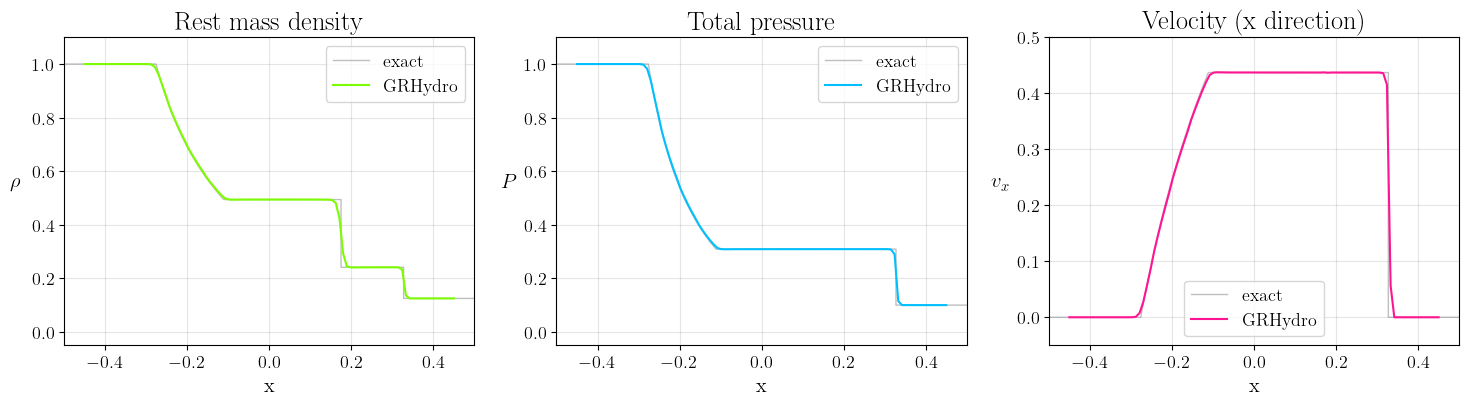

In [16]:
# FOR SOD800

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(x_exact, rho_exact, c='grey', alpha=0.5, lw=1, label="exact")
axes[0].plot(*rho_final800.coordinates_meshgrid(), rho_final800.data_xyz, c='lawngreen', label="GRHydro")
axes[0].set_title('Rest mass density', fontsize=19)
axes[0].set_ylabel(r'$\rho$', rotation=0, labelpad=12, fontsize=15)
axes[0].set_ylim(-0.05, 1.1)

axes[1].plot(x_exact, press_exact, c='grey', alpha=0.5, lw=1, label="exact")
axes[1].plot(*press_final800.coordinates_meshgrid(), press_final800.data_xyz, c='deepskyblue', label="GRHydro")
axes[1].set_title('Total pressure', fontsize=19)
axes[1].set_ylabel(r'$P$', rotation=0, labelpad=12, fontsize=15)
axes[1].set_ylim(-0.05, 1.1)

axes[2].plot(x_exact, vx_exact, c='grey', alpha=0.5, lw=1, label="exact")
axes[2].plot(*vx_final800.coordinates_meshgrid(), vx_final800.data_xyz, c='deeppink', label="GRHydro")
axes[2].set_title('Velocity (x direction)', fontsize=19)
axes[2].set_ylabel(r'$v_x$', rotation=0, labelpad=12, fontsize=15)
axes[2].set_ylim(-0.05, 0.5)

for ax in axes:
    ax.grid(alpha=0.2, c='grey')
    ax.set_xlabel('x', fontsize=15)
    ax.tick_params(axis='x', labelsize=13)
    ax.tick_params(axis='y', labelsize=13)
    ax.legend(fontsize=13)
    ax.set_xlim(-0.5, 0.5)

plt.savefig('Sod_800_results', dpi=200, bbox_inches='tight')
plt.show()

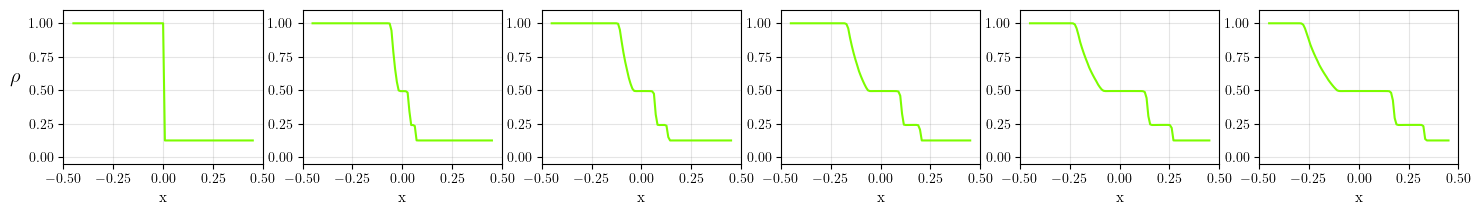

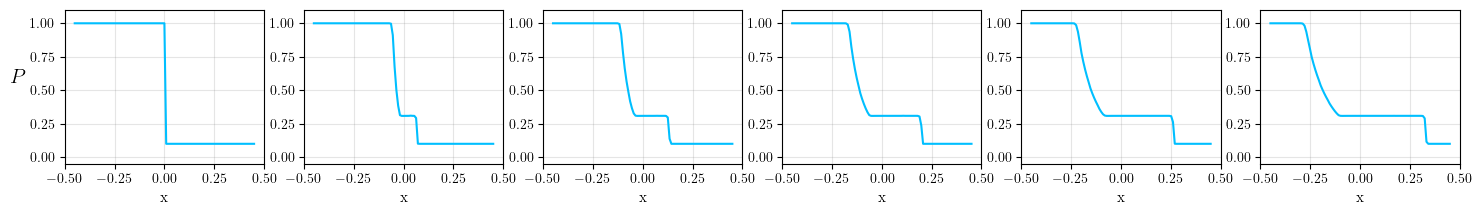

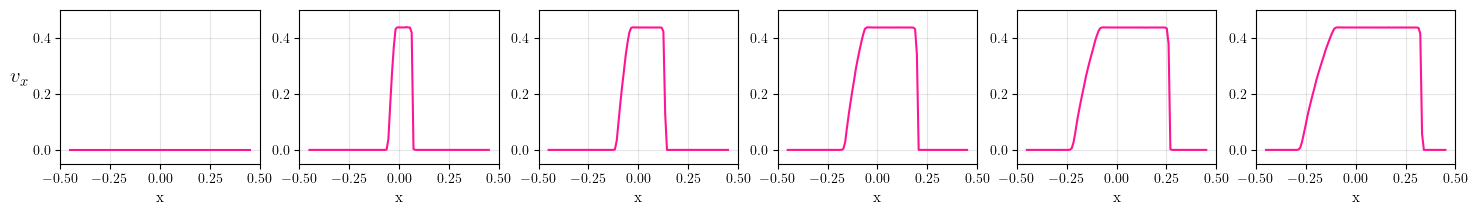

In [17]:
# TO PLOT THE TIME EVOLUTION

fig_rho, axes_rho = plt.subplots(1, 6, figsize=(18, 2))
fig_press, axes_press = plt.subplots(1, 6, figsize=(18, 2))
fig_vx, axes_vx = plt.subplots(1, 6, figsize=(18, 2))

# For Sod200: 0 20 40 60 80 100
# For Sod400: 0 40 80 120 160 200
# For Sod800: 0 80 160 240 320 400

iterat = [0, 80, 160, 240, 320, 400]

for j, it_num in enumerate(iterat):
    
    rho_it = rho800.read_on_grid(it_num, small_grid)
    press_it = press800.read_on_grid(it_num, small_grid)
    vx_it = vx800.read_on_grid(it_num, small_grid)

    axes_rho[j].plot(*rho_it.coordinates_meshgrid(), rho_it.data_xyz, c='lawngreen')
    axes_rho[j].set_ylim(-0.05, 1.1) 
    axes_rho[j].set_xlabel('x', fontsize=11)
    axes_rho[j].grid(alpha=0.2, c='grey')
    #axes_rho[j].tick_params(axis='x', labelsize=7)
    axes_rho[j].set_xlim(-0.5, 0.5)

    axes_press[j].plot(*press_it.coordinates_meshgrid(), press_it.data_xyz, c='deepskyblue')
    axes_press[j].set_ylim(-0.05, 1.1) 
    axes_press[j].set_xlabel('x', fontsize=11)
    axes_press[j].grid(alpha=0.2, c='grey')
    #axes_press[j].tick_params(axis='x', labelsize=7)
    axes_press[j].set_xlim(-0.5, 0.5)

    axes_vx[j].plot(*vx_it.coordinates_meshgrid(), vx_it.data_xyz, c='deeppink')
    axes_vx[j].set_ylim(-0.05, 0.5) 
    axes_vx[j].set_xlabel('x', fontsize=11)
    axes_vx[j].grid(alpha=0.2, c='grey')
    #axes_vx[j].tick_params(axis='x', labelsize=7)
    axes_vx[j].set_xlim(-0.5, 0.5)


    if (j==0): 
        axes_rho[j].set_ylabel(r'$\rho$', rotation=0, labelpad=10, fontsize=15)
        #axes_rho[j].tick_params(axis='y', labelsize=7)

        axes_press[j].set_ylabel(r'$P$', rotation=0, labelpad=10, fontsize=15)
        #axes_press[j].tick_params(axis='y', labelsize=7)
        
        axes_vx[j].set_ylabel(r'$v_x$', rotation=0, labelpad=10, fontsize=15)
        #axes_vx[j].tick_params(axis='y', labelsize=7)

fig_rho.savefig('rho_evolution.png', dpi=200, bbox_inches='tight')
fig_press.savefig('pressure_evolution.png', dpi=200, bbox_inches='tight')
fig_vx.savefig('vx_evolution.png', dpi=300, bbox_inches='tight')        
plt.show()

## Alternative Method
This method can only be used with simulations that used only one refinement level (i.e., a uniform grid) and using only 1 MPI process.

In [18]:
#[iterazione][refinement level][component number]
# refinement level 0 is the full domain. refinement level 1 is the eventual smaller box with a finer refinement (and ONLY covers
# that box, while level 0 covers the full domain = both the coarser and the finer grids. I suppose level 2 goes on like this.)
# component number is something that matters for clusters, we don't care about it.
rho200[0][0][0].data
rho400[0][0][0].data
rho800[0][0][0].data

press200[0][0][0].data
press400[0][0][0].data
press800[0][0][0].data

vx200[0][0][0].data
vx400[0][0][0].data
vx800[0][0][0].data

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
# .coordinates() returns the grid point coordinates for each axis (x, y, z)
rho200[0][0][0].coordinates()[0].data
rho400[0][0][0].coordinates()[0].data
rho800[0][0][0].coordinates()[0].data

press200[0][0][0].coordinates()[0].data
press400[0][0][0].coordinates()[0].data
press800[0][0][0].coordinates()[0].data

vx200[0][0][0].coordinates()[0].data
vx400[0][0][0].coordinates()[0].data
vx800[0][0][0].coordinates()[0].data

array([-4.98750000e-01, -4.97500000e-01, -4.96250000e-01, -4.95000000e-01,
       -4.93750000e-01, -4.92500000e-01, -4.91250000e-01, -4.90000000e-01,
       -4.88750000e-01, -4.87500000e-01, -4.86250000e-01, -4.85000000e-01,
       -4.83750000e-01, -4.82500000e-01, -4.81250000e-01, -4.80000000e-01,
       -4.78750000e-01, -4.77500000e-01, -4.76250000e-01, -4.75000000e-01,
       -4.73750000e-01, -4.72500000e-01, -4.71250000e-01, -4.70000000e-01,
       -4.68750000e-01, -4.67500000e-01, -4.66250000e-01, -4.65000000e-01,
       -4.63750000e-01, -4.62500000e-01, -4.61250000e-01, -4.60000000e-01,
       -4.58750000e-01, -4.57500000e-01, -4.56250000e-01, -4.55000000e-01,
       -4.53750000e-01, -4.52500000e-01, -4.51250000e-01, -4.50000000e-01,
       -4.48750000e-01, -4.47500000e-01, -4.46250000e-01, -4.45000000e-01,
       -4.43750000e-01, -4.42500000e-01, -4.41250000e-01, -4.40000000e-01,
       -4.38750000e-01, -4.37500000e-01, -4.36250000e-01, -4.35000000e-01,
       -4.33750000e-01, -

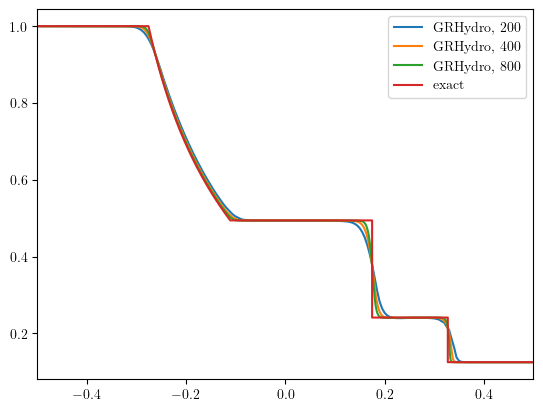

In [20]:
# rest mass density
plt.plot(rho200[100][0][0].coordinates()[0].data,rho200[100][0][0].data, label="GRHydro, 200")
plt.plot(rho400[200][0][0].coordinates()[0].data,rho400[200][0][0].data, label="GRHydro, 400")
plt.plot(rho800[400][0][0].coordinates()[0].data,rho800[400][0][0].data, label="GRHydro, 800")
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.show()

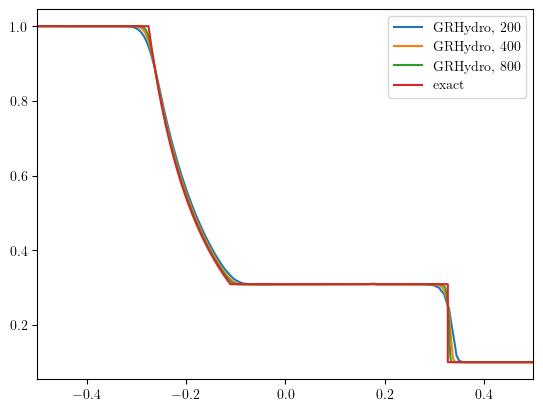

In [21]:
# total pressure
plt.plot(press200[100][0][0].coordinates()[0].data,press200[100][0][0].data, label="GRHydro, 200")
plt.plot(press400[200][0][0].coordinates()[0].data,press400[200][0][0].data, label="GRHydro, 400")
plt.plot(press800[400][0][0].coordinates()[0].data,press800[400][0][0].data, label="GRHydro, 800")
plt.plot(x_exact, press_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.show()

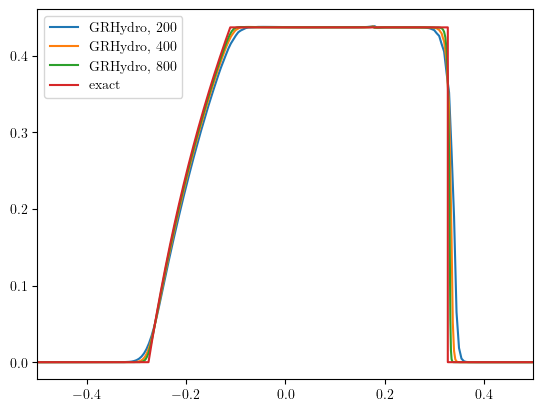

In [22]:
# velocity along x
plt.plot(vx200[100][0][0].coordinates()[0].data,vx200[100][0][0].data, label="GRHydro, 200")
plt.plot(vx400[200][0][0].coordinates()[0].data,vx400[200][0][0].data, label="GRHydro, 400")
plt.plot(vx800[400][0][0].coordinates()[0].data,vx800[400][0][0].data, label="GRHydro, 800")
plt.plot(x_exact, vx_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.show()